# Fuzzy Logic Modeling with Python

<b>The modeling of the detergent amount of the washing machine with the Mamdani type fuzzy logic system will be shown on the example. The first step to apply fuzzy logic to a system is to determine the inputs and outputs of the system. In the example problem, the user expects the washing machine to clean the laundry and not damage the laundry. For these expectations, fuzzy logic The inputs of the model and all parameters are very important. The inputs to be applied to the problem are the amount of laundry, the degree of soiling and the type of laundry. These inputs will determine the amount of detergent to be used by the machine.

The model is aimed to analyze the most economical and successful washing conditions according to the amount of laundry, the degree of soiling of the laundry and the type of laundry. After the inputs are determined, the membership functions and parameters of the inputs should be determined.

The membership functions of the inputs are determined as follows:<b>

$amount of laundry = \begin{cases}
 & \text{ few (trapezoid)} =(0,1,5,8)\\
 & \text{ middle(triangle) } =(6,12,18) \\
 & \text{ a lot(trapezoid) } = (15,20,30,30)
\end{cases}$

$degree of dirty = \begin{cases}
 & \text{ a little dirty (trapezoid)} =(0,5,15,35)\\
 & \text{ middle dirty (triangle) } =(15,50,85) \\
 & \text{ a lot dirty (trapezoid)} = (65,100,120,120)
\end{cases}$

$type of laundry = \begin{cases}
 & \text{ sensitive (trapezoid)} =(0,5,15,35)\\
 & \text{ mixed (triangle) } =(15,50,85) \\
 & \text{ strong (trapezoid)} = (65,100,120,120)
\end{cases}$

<b>Membership functions and parameters of the output:

$amount of detergent = \begin{cases}
 & \text{ too little (trapezoid)} =(0,5,15,20)\\
 & \text{ little (triangle)} =(17,32,42) \\
 & \text{ normal (triangle)} = (32,57,67)\\
 & \text{ a lot (triangle)} = (57,67,92) \\
 & \text{ too much (trapezoid)} = (82,92,100,100)
\end{cases}$

<b>After determining the membership functions and parameters of the input and output, it is necessary to determine the rule base in order to create the fuzzy logic model. Some of the rules created for this problem are as follows:

<b>1-) If the amount of laundry = few AND degree of dirty = a little dirty AND type of laundry = sensitive, IF amount of detergent = too little<b>

<b>2-) If the amount of laundry = few AND degree of dirty = a lot dirty AND type of laundry = mixed, IF amount of detergent = normal<b>

<b>3-) If amount of laundry = middle AND degree of dirty = middle dirty AND type of laundry = strong IF amount of detergent = normal<b>

<b>4-) If the amount of laundry = a lot AND degree of dirty = a lot dirty AND type of laundry = mixed IF amount of detergent = too much<b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import membership as mf

<b>We define a range for the amount of laundry, the degree of dirty, the type of laundry and the amount of detergent.

In [2]:
range_laundry = np.arange(0, 31)
range_dirty = np.arange(0, 121)
range_type_laundry = np.arange(0, 121)
range_detergent = np.arange(0, 101)

<b>We create a membership function for each of the linguistic values we have determined. 'trapmf' means trapezoidal membership function and 'trimf' means triangle membership function. For detailed information about the functions, you can refer to the Scikit-Fuzzy documentation.

In [3]:
laoundry_few = mf.trapmf(range_laundry, [0,1,5,8])
laoundry_middle = mf.trimf(range_laundry, [6,12,18])
laoundy_alot = mf.trapmf(range_laundry, [15,20,30,30])

dirty_alittle = mf.trapmf(range_dirty, [0,5,15,35])
dirty_middle = mf.trimf(range_dirty, [15,50,85])
dirty_alot = mf.trapmf(range_dirty, [65,100,120,120])

type_laundry_sensitive = mf.trapmf(range_type_laundry, [0,5,15,35])
type_laundry_mixed = mf.trimf(range_type_laundry, [15,50,85])
type_laundry_strong = mf.trapmf(range_type_laundry, [65,100,120,120])

detergent_toolittle = mf.trapmf(range_detergent, [0,5,15,20])
detergent_little = mf.trimf(range_detergent, [17,32,42])
detergent_normal = mf.trimf(range_detergent, [32,57,67])
detergent_alot = mf.trimf(range_detergent, [57,67,92])
detergent_toomuch = mf.trapmf(range_detergent, [82,92,100,100])


<b>Let's graph the membership functions we created above and examine their appearance.

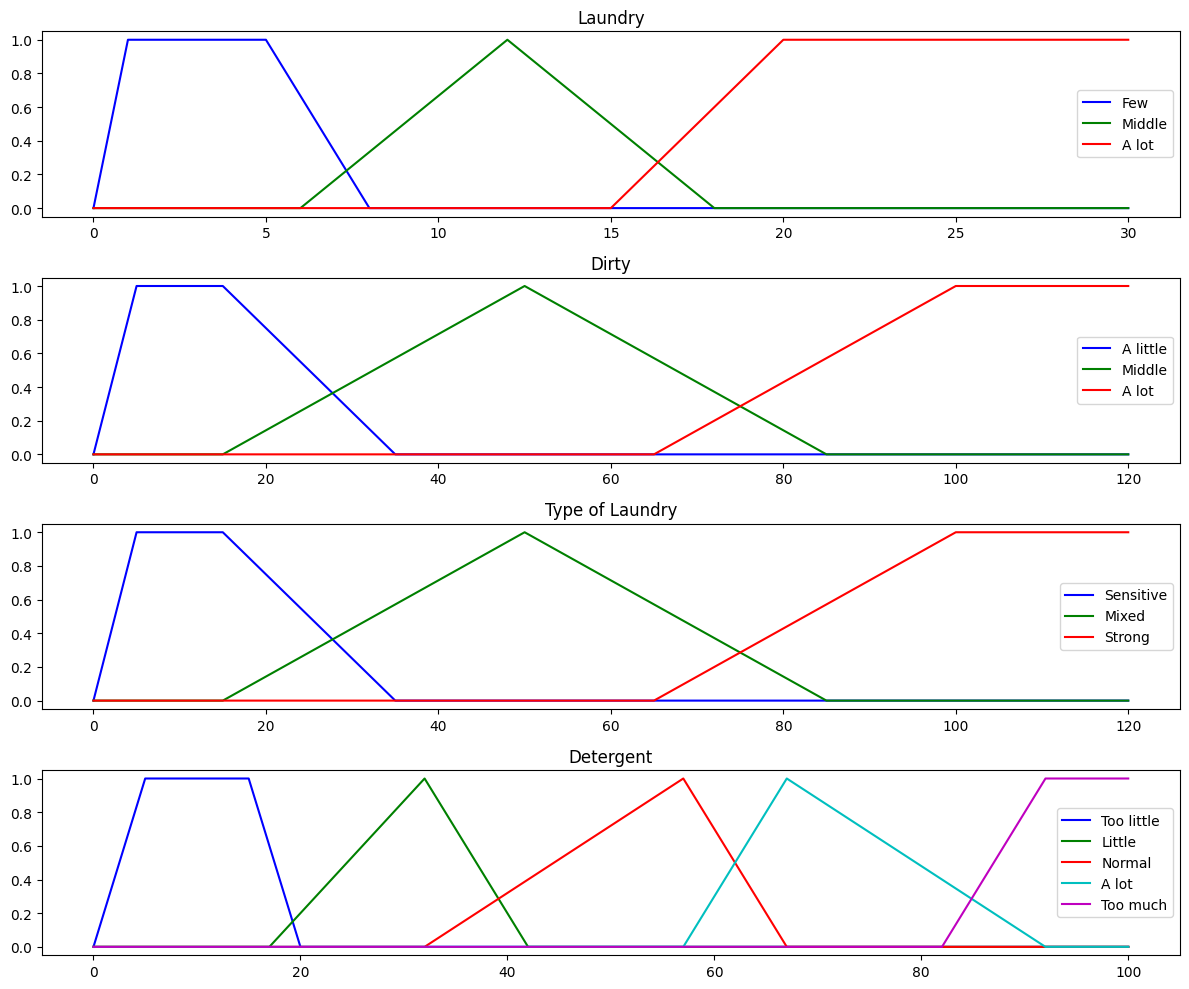

In [4]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(12, 10))

ax0.plot(range_laundry, laoundry_few, 'b', linewidth=1.5, label='Few')
ax0.plot(range_laundry, laoundry_middle, 'g', linewidth=1.5, label='Middle')
ax0.plot(range_laundry, laoundy_alot, 'r', linewidth=1.5, label='A lot')
ax0.set_title('Laundry')
ax0.legend()

ax1.plot(range_dirty, dirty_alittle, 'b', linewidth=1.5, label='A little')
ax1.plot(range_dirty, dirty_middle, 'g', linewidth=1.5, label='Middle')
ax1.plot(range_dirty, dirty_alot, 'r', linewidth=1.5, label='A lot')
ax1.set_title('Dirty')
ax1.legend()

ax2.plot(range_type_laundry, type_laundry_sensitive, 'b', linewidth=1.5, label='Sensitive')
ax2.plot(range_type_laundry, type_laundry_mixed, 'g', linewidth=1.5, label='Mixed')
ax2.plot(range_type_laundry, type_laundry_strong, 'r', linewidth=1.5, label='Strong')
ax2.set_title('Type of Laundry')
ax2.legend()

ax3.plot(range_detergent, detergent_toolittle, 'b', linewidth=1.5, label='Too little')
ax3.plot(range_detergent, detergent_little, 'g', linewidth=1.5, label='Little')
ax3.plot(range_detergent, detergent_normal, 'r', linewidth=1.5, label='Normal')
ax3.plot(range_detergent, detergent_alot, 'c', linewidth=1.5, label='A lot')
ax3.plot(range_detergent, detergent_toomuch, 'm', linewidth=1.5, label='Too much')
ax3.set_title('Detergent')
ax3.legend()

plt.tight_layout()


<b>Now let's look at the membership degrees to the fuzzy sets we created for the new inputs.

In [5]:
input_laundry = 7
input_dirty = 25
input_type_laundry = 30

<b>The 'interp_membership' method is a method used to calculate membership values

In [6]:
laoundry_few_ft = fuzz.interp_membership(range_laundry, laoundry_few, input_laundry)
laoundry_middle_ft = fuzz.interp_membership(range_laundry, laoundry_middle, input_laundry)
laoundy_alot_ft = fuzz.interp_membership(range_laundry, laoundy_alot, input_laundry)

dirty_alittle_ft = fuzz.interp_membership(range_dirty, dirty_alittle, input_dirty)
dirty_middle_ft = fuzz.interp_membership(range_dirty, dirty_middle, input_dirty)
dirty_alot_ft = fuzz.interp_membership(range_dirty, dirty_alot, input_dirty)

type_laundry_sensitive_ft = fuzz.interp_membership(range_type_laundry, type_laundry_sensitive, input_type_laundry)
type_laundry_mixed_ft = fuzz.interp_membership(range_type_laundry, type_laundry_mixed, input_type_laundry)
type_laundry_strong_ft = fuzz.interp_membership(range_type_laundry, type_laundry_strong, input_type_laundry)

<b>We have converted the input values into fuzzy numbers. Now let's give these numbers to the rules we have determined before.

<b>The 'fmax' and 'fmin' methods of the NumPy library are the methods that find the minimum and maximum elements of the lists by making an elementary comparison.
fmax represents the conjunction or, and fmin represents the conjunction and.

In [7]:
rule1 = np.fmin(np.fmin(np.fmin(laoundry_few_ft, dirty_alittle_ft), 
                    type_laundry_sensitive_ft), detergent_toolittle)
rule2 = np.fmin(np.fmin(np.fmin(laoundry_few_ft, dirty_alot_ft), 
                    type_laundry_mixed_ft), detergent_normal)
rule3 = np.fmin(np.fmin(np.fmin(laoundry_middle_ft, dirty_middle_ft),
                    type_laundry_strong_ft), detergent_normal)
rule4 = np.fmin(np.fmin(np.fmin(laoundy_alot_ft, dirty_alot_ft), 
                    type_laundry_mixed_ft), detergent_toomuch)

<b>Outputs from the rules

In [8]:
out_alittle = rule1
out_normal = np.fmax(rule2, rule3)
out_alot = rule4

<b>Let's examine the regions where the inputs cut on the output sets graphically.

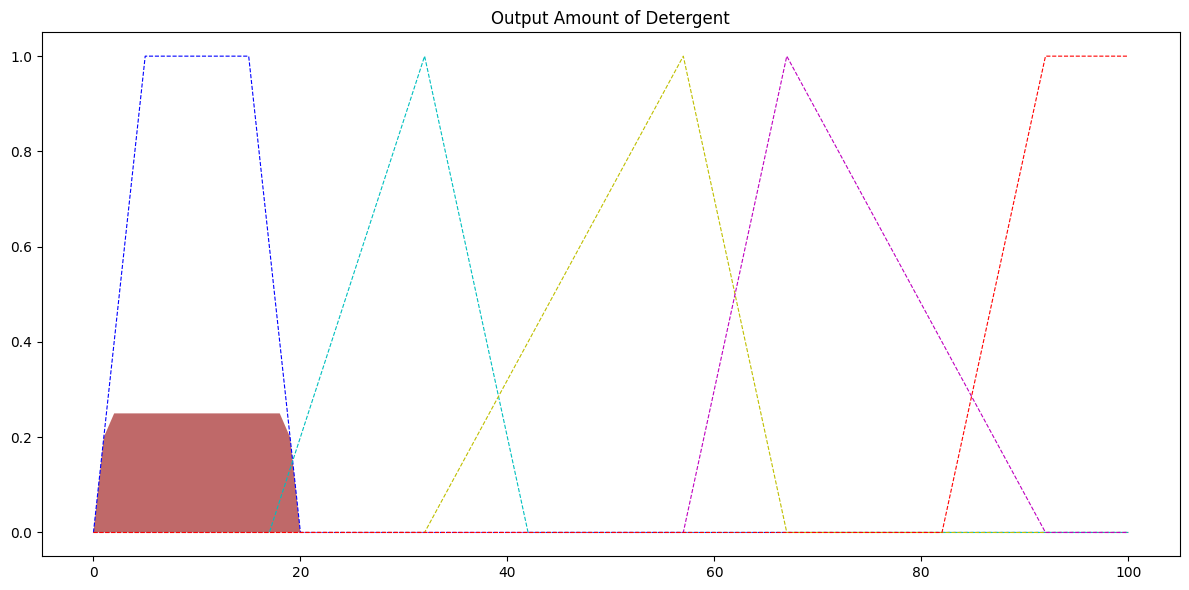

In [9]:
detergent = np.zeros_like(range_detergent)

fig, ax0 = plt.subplots(figsize=(12, 6))

ax0.fill_between(range_detergent, detergent, out_alittle, facecolor='brown', alpha=0.7)
ax0.plot(range_detergent, detergent_toolittle, 'b', linewidth=0.8, linestyle='--', )
ax0.plot(range_detergent, detergent_little, 'c', linewidth=0.8, linestyle='--')
ax0.fill_between(range_detergent, detergent, out_normal, facecolor='g', alpha=0.7)
ax0.plot(range_detergent, detergent_normal, 'y', linewidth=0.8, linestyle='--')
ax0.fill_between(range_detergent, detergent, out_alot, facecolor='r', alpha=0.7)
ax0.plot(range_detergent, detergent_alot, 'm', linewidth=0.8, linestyle='--')
ax0.plot(range_detergent, detergent_toomuch, 'r', linewidth=0.8, linestyle='--')
ax0.set_title('Output Amount of Detergent')
plt.tight_layout()

<b>As the final step, we move on to the defuzzification process. First, let's calculate the combination of the fields shown on the output sets, again with the fmax method, and transfer it to the defuzzification function as a single output set.

<b>'out_detergent' is the final version of our output set. The 'defuzz' method is the defuzzification function

In [11]:
out_detergent = np.fmax(out_alittle, 
                    np.fmax(out_normal, out_alot))

<b>Now let's examine our output according to different defuzzification methods.
- Centroid
- Min of Maximum
- Max of Maximum

In [12]:
defuzzified_centroid = fuzz.defuzz(range_detergent, out_detergent, 'centroid')

result_centroid = fuzz.interp_membership(range_detergent, out_detergent, defuzzified_centroid)

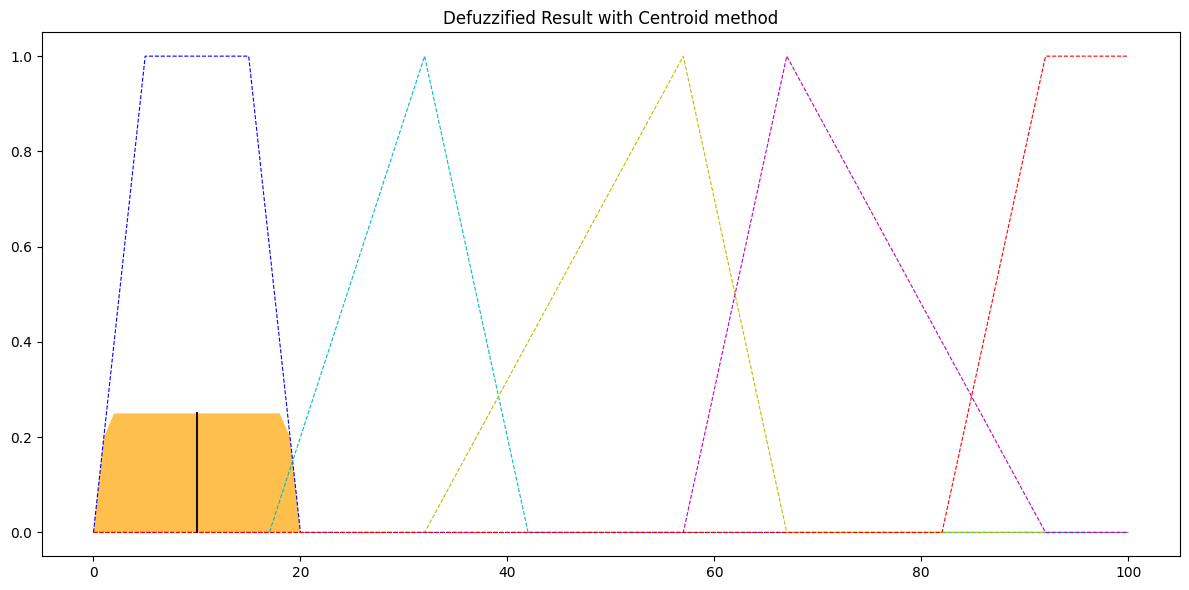

In [13]:
# plot defuzzified result
fig, ax0 = plt.subplots(figsize=(12, 6))
ax0.plot(range_detergent, detergent_toolittle, 'b', linewidth=0.8, linestyle='--', )
ax0.plot(range_detergent, detergent_little, 'c', linewidth=0.8, linestyle='--')
ax0.plot(range_detergent, detergent_normal, 'y', linewidth=0.8, linestyle='--')
ax0.plot(range_detergent, detergent_alot, 'm', linewidth=0.8, linestyle='--')
ax0.plot(range_detergent, detergent_toomuch, 'r', linewidth=0.8, linestyle='--')
ax0.fill_between(range_detergent, detergent, out_detergent, facecolor='Orange', alpha=0.7)
ax0.plot([defuzzified_centroid, defuzzified_centroid], [0, result_centroid], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Defuzzified Result with Centroid method')
plt.tight_layout()

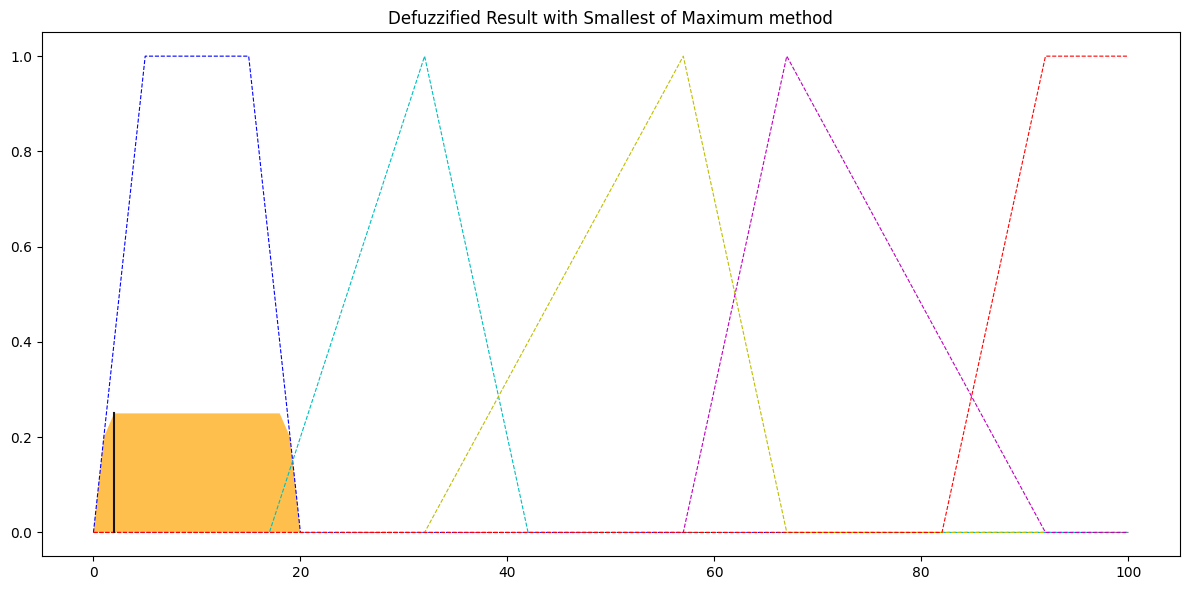

In [14]:
#min of maximum
defuzzified_som = fuzz.defuzz(range_detergent, out_detergent, 'som')

result_som = fuzz.interp_membership(range_detergent, out_detergent, defuzzified_som)

# plot defuzzified result
fig, ax0 = plt.subplots(figsize=(12, 6))
ax0.plot(range_detergent, detergent_toolittle, 'b', linewidth=0.8, linestyle='--', )
ax0.plot(range_detergent, detergent_little, 'c', linewidth=0.8, linestyle='--')
ax0.plot(range_detergent, detergent_normal, 'y', linewidth=0.8, linestyle='--')
ax0.plot(range_detergent, detergent_alot, 'm', linewidth=0.8, linestyle='--')
ax0.plot(range_detergent, detergent_toomuch, 'r', linewidth=0.8, linestyle='--')
ax0.fill_between(range_detergent, detergent, out_detergent, facecolor='Orange', alpha=0.7)
ax0.plot([defuzzified_som, defuzzified_som], [0, result_som], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Defuzzified Result with Smallest of Maximum method')
plt.tight_layout()

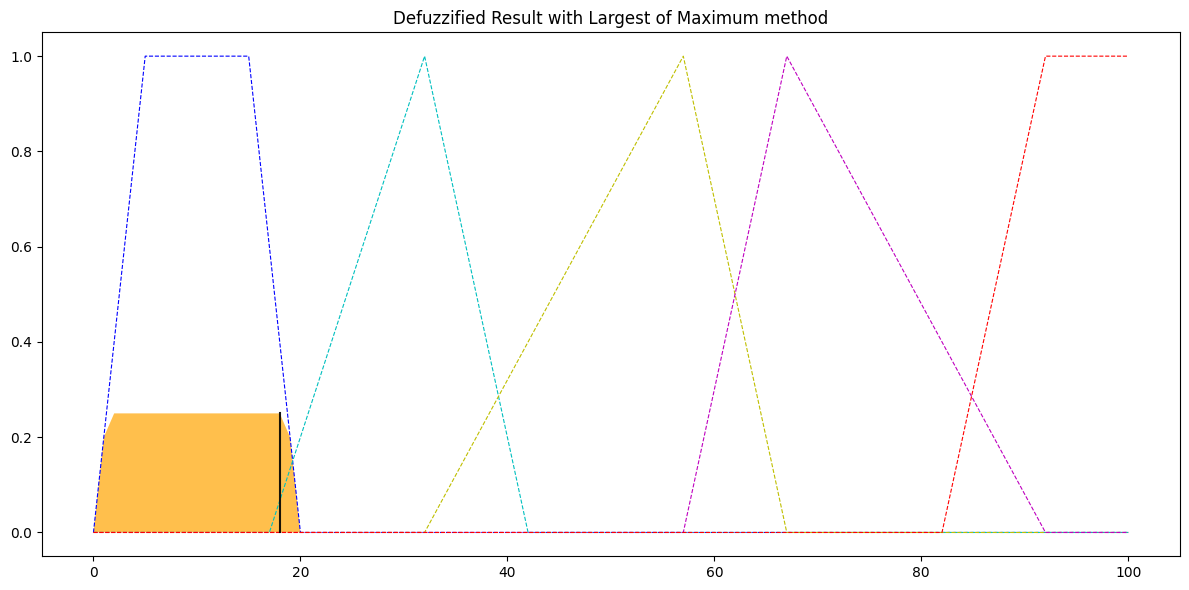

In [15]:
#max of maximum
defuzzified_lom = fuzz.defuzz(range_detergent, out_detergent, 'lom')

result_lom = fuzz.interp_membership(range_detergent, out_detergent, defuzzified_lom)

# plot defuzzified result
fig, ax0 = plt.subplots(figsize=(12, 6))
ax0.plot(range_detergent, detergent_toolittle, 'b', linewidth=0.8, linestyle='--', )
ax0.plot(range_detergent, detergent_little, 'c', linewidth=0.8, linestyle='--')
ax0.plot(range_detergent, detergent_normal, 'y', linewidth=0.8, linestyle='--')
ax0.plot(range_detergent, detergent_alot, 'm', linewidth=0.8, linestyle='--')
ax0.plot(range_detergent, detergent_toomuch, 'r', linewidth=0.8, linestyle='--')
ax0.fill_between(range_detergent, detergent, out_detergent, facecolor='Orange', alpha=0.7)
ax0.plot([defuzzified_lom, defuzzified_lom], [0, result_lom], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Defuzzified Result with Largest of Maximum method')
plt.tight_layout()

In [16]:
print('Defuzzified Result with Centroid method: ', defuzzified_centroid)
print('Defuzzified Result with Smallest of Maximum method: ', defuzzified_som)
print('Defuzzified Result with Largest of Maximum method: ', defuzzified_lom)

Defuzzified Result with Centroid method:  10.0
Defuzzified Result with Smallest of Maximum method:  2
Defuzzified Result with Largest of Maximum method:  18


In [17]:
print("result_centroid: ", result_centroid)
print("result_som: ", result_som)
print("result_lom: ", result_lom)

result_centroid:  0.25
result_som:  0.25
result_lom:  0.25


<b>When 7 pieces of laundry are put into the washing machine, if the degree of dirty of the laundry is 25% and the sensitivity degree of the laundry is 30%, the amount of detergent changes according to the defuzzcation method:
10 by the center method,
2 with the Smallest of Maximum method,
It will be calculated as 18 with the Largest of Maximum method.